Opis problemu
============
Problem pochodzi z [konkursu](https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802)


Średniej wielkości bank w Indiach zajmujący się pożyczkami u indywidualnych klientów posiada platformę internetową do udzielania kredytów. Bank pozyskuje wielu klientów poprzez kampanie reklamowe, spamowanie poczty, telemarketing.
Tysiące klientów przekłada się na mały procent udzielanych kredytów. Celem modelu będzie klasyfikacja klienta na podstawie wypełnionego formularza czy zostanie mu przydzielony kredyt. Klient najpierw wypełnia formularz internetowy podając swoje dane osobowe oraz wysokość kwotę o jaką się ubiega. Następnie bank wysyła swoją propozycję spłaty kredytu, która może pokrywać się z deklaracjami klienta. Kolejnymi etapami są dostarczenie dokumentów do oddziału, zalogowanie klienta w systemie. Następnie bank ostatecznie podejmuje decyzje o udzieleniu kredytu.

Dane wejściowe:
* **ID** -identyfikator klienta (nieużywany do predykcji)
* **Gender**- płeć
* **City**- miasto
* **Monthly_Income** - przychód miesięczny
* **DOB**- data urodzenia
* **Lead_Creation_Date** - data złożenia formularza
* **Loan_Amount_Applied** - żądana kwota pożyczki w rupiach
* **Loan_Tenure_Applied** - okres spłaty w latach
* **Existing_EMI** - istniejące raty kredytów do spłaty
* **Employer_Name** - nazwa pracodawcy
* **Salary_Account** - nazwa banku konta bankowego
* **Mobile_Verified** - weryfikacja telefoniczna
* **Var5** - ciągła zmienna
* **Var1** - zmienna kategoryczna z wieloma poziomami
* **Loan_Amount_Submitted** - przyznana kwota pożyczki po weryfikacji
* **Loan_Tenure_Submitted** - przyznana czas spłaty po weryfikacji
* **Interest_Rate** - oprocentowanie pożyczki
* **Processing_Fee** - odsetki w rupiach
* **EMI_Loan_Submitted** - przyznana miesięczna spłata
* **Filled_Form** - wypełniony formularz
* **Device_Type** - urządzenie, z którego wysłano formularz (Przeglądarka/Telefon)
* **Var2** - zmienna kategoryczna z wieloma poziomami
* **Source** - zmienna kategoryczna z wieloma poziomami
* **Var4** - zmienna kategoryczna z wieloma poziomami

Dane wyjściowe
* **LoggedIn** - Zalogowanie w aplikacji (zmienna umożliwiająca zrozumienie problemu - nie może być używana w przewidywaniu)
* **Disbursed** - wypłata pożyczki (zmienna objaśniana)

In [2]:
import pandas as pd
import numpy as np

# wczytuje dane
data = pd.read_csv('HappyCustomerBank.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77020 entries, 0 to 77019
Data columns (total 26 columns):
ID                       77020 non-null object
Gender                   77020 non-null object
City                     76114 non-null object
Monthly_Income           77020 non-null int64
DOB                      77020 non-null object
Lead_Creation_Date       77020 non-null object
Loan_Amount_Applied      76959 non-null float64
Loan_Tenure_Applied      76959 non-null float64
Existing_EMI             76959 non-null float64
Employer_Name            76959 non-null object
Salary_Account           66622 non-null object
Mobile_Verified          77020 non-null object
Var5                     77020 non-null int64
Var1                     77020 non-null object
Loan_Amount_Submitted    46372 non-null float64
Loan_Tenure_Submitted    46372 non-null float64
Interest_Rate            24495 non-null float64
Processing_Fee           24226 non-null float64
EMI_Loan_Submitted       24495 non-null 

In [3]:
# wycinek danych
data.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID079827H20,Male,Agra,34500,05-Dec-79,02-Jul-15,500000.0,4.0,0.0,AIR TREATMENT ENGINEERING PVT LTD,...,13.99,2500.0,13660.73,Y,Web-browser,G,S122,5,0,0
1,ID025067D20,Female,Chennai,12000,16-Mar-93,20-May-15,0.0,0.0,0.0,AGS HEALTH PVT LTD,...,NaN,NaN,NaN,N,Mobile,C,S133,1,0,0
2,ID047181R10,Female,Delhi,47000,10-Oct-57,07-Jun-15,500000.0,5.0,36000.0,GOVERMENT SCHOOL,...,NaN,NaN,NaN,N,Web-browser,B,S133,1,0,0
3,ID096476Q10,Female,Bhiwani,40000,01-Jun-84,14-Jul-15,1000000.0,5.0,3500.0,JABONG.COM,...,NaN,NaN,NaN,N,Web-browser,G,S122,3,0,0
4,ID080804W40,Female,Gurgaon,37491,09-Feb-84,03-Jul-15,0.0,0.0,0.0,APCO INFRA TECH LTD,...,NaN,NaN,NaN,N,Mobile,G,S122,3,0,0


In [4]:
import pylab as plt

# histogramy zmiennych, pogrupowanych względem z zmiennej objaśnianej `Disbursed` 

column_names = data.select_dtypes(exclude=['object']).columns.difference(['Disbursed', 'LoggedIn'])
i=0
while i < len(column_names):
    if i==len(column_names)-1:
        fig, ax1 = plt.subplots(1,1)
        data.groupby("Disbursed")[column_names[i]].hist(alpha=0.2, ax=ax1, density=True)
        ax1.title.set_text(column_names[i])
        break
    fig, (ax1, ax2) = plt.subplots(1,2)
    data.groupby("Disbursed")[column_names[i]].hist(alpha=0.2, ax=ax1, density=True, figsize=(15,5))
    ax1.title.set_text(column_names[i])

    data.groupby("Disbursed")[column_names[i+1]].hist(alpha=0.2, ax=ax2, density=True, figsize=(15,5))
    ax2.title.set_text(column_names[i+1])
    i+=2

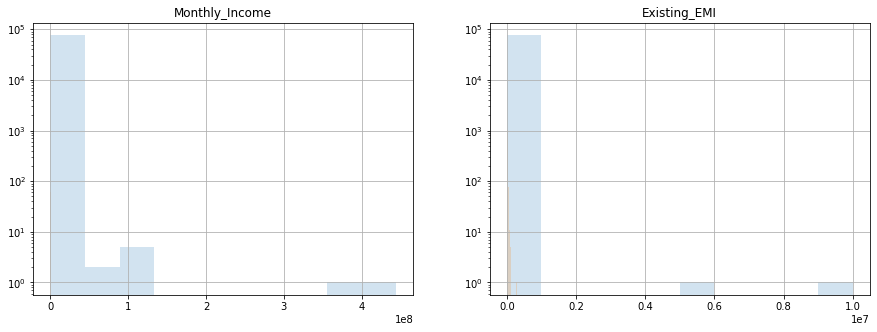

In [5]:
    fig, (ax1, ax2) = plt.subplots(1,2)
    data.groupby("Disbursed")['Monthly_Income'].hist(alpha=0.2, ax=ax1,figsize=(15,5),log=True)
    ax1.title.set_text('Monthly_Income')

    data.groupby("Disbursed")['Existing_EMI'].hist(alpha=0.2, ax=ax2, figsize=(15,5), log=True)
    ax2.title.set_text('Existing_EMI')

In [6]:
data.groupby("Disbursed").median()

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Var4,LoggedIn
Disbursed,,,,,,,,,,,,
0,25000,100000.0,2.0,0.0,2,300000.0,4.0,18.00,3900.0,9333.70,3,0
1,49000,250000.0,3.0,0.0,12,400000.0,4.0,14.85,4000.0,11183.06,3,1


Analiza danych
=======
Z wartości środkowych ciężko jest wysnuć jakieś ciekawe spostrzeżenia, na pewno osoby mające większy dochód miesięczny mają większy szanse na otrzymanie kredytu.

Powyżej przedstawiam także rozkłady zmiennych liczbowych, pogrupowanych względem danej wyjściowej.
Niebieskie rozkłady przyporządkowane są klientom, którym odmówiono udzielenie kredytu. Rozkłady zmiennej `Var5` różnią się znacząco, niestety nie jest dokładnie powiedziane, co przedstawia ta zmienna.

Histogramy zmiennych `Monthly_Income`, `Existing_EMI` przedstawiono także w skali logarytmincznej, ponieważ  w skali liniowej są nie czytlene.


Przetwarzanie danych
=============
Posiadamy dane 77020 klientów, z czego 1,4% z nich otrzymało pożyczkę.
Mamy do czynienia z niezbalansowaną licznością klas. Dodatkowo kilka zmiennych ma braki danych w ponad 40%.
* zmienne `Monthly_Income`, `Existing_EMI` zostały przekształcone funkcją $log(x+1)$
* zmienne liczbowe z dużymi brakami:
`Loan_Amount_Submitted`,
`Loan_Tenure_Submitted`,
`Interest_Rate`,
`Processing_Fee`,
`EMI_Loan_Submitted`. Przekształcamy na zmienne kategoryczne. Konkretną liczbę kodujemy na odpowiedni kwartyl `Q1`,`Q2`,`Q3`,`Q4` lub  wartość `M` oznaczającą brak danych. 
* Dla zmiennych typu `Var1`,`Var2`,`Source` o wielu kategoriach mało popularne wartości(poniżej 10%) zmienia na `other`.
* Dane o miastach zostaną zastąpione populacją danego miasta, braki danych zostaną zastąpione populacją średniego miasta w Indiach.
* Zmienne posiadające dwie kategorie (`Gender`, `Device_Type`,`Mobile_Verified`,`Filled_Form`) zostaną zakodowane na 0,1.
* Zmienne  `Employer_Name`, `Salary_Account` zostaja zastąpione czestością występownia w zbiorze trenigowym,
    w przypdku braku wystąpienia do zmiennnej przporzdkowana jest jedynka.
* pozostałe zmienne liczbowez małymi brakami zostaną uzupełnionee wartością środkową.
* wszytkie zmienne liczbowe zostały ustandaryzowane

Dodawanie nowych zmiennych
-------------------
Klasa `NewFeatures` dodaje zmienne
* `Lead_Creation_Client_Age` - Na podstawie daty urodzenia i daty złożenia wniosku tworzę zmienną liczbową. Oznaczająca wiek klienta składającego wniosek w latach.

* `Loan_Eqeuality` - Zmienna bool ma wartość `True` jeżeli przyznana kwota kredytu jest równa kwocie kredytu wnioskowanej przez klienta.

In [7]:
import numpy as np
import datetime
import json

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder





# features engering
class NewFeatures(BaseEstimator, TransformerMixin):
    """
    Class crete new features, drops useless column, encodes features.
    """

    def __init__(self, date_format="%d-%b-%y"):
        self.date_format = date_format
        self.DATE = datetime.datetime(2015, 9, 4) # data udostępnienia danych
        self.threshold = 0.1  # próg odrzucenia wartości zmiennych kategorycznych z małym prawdopodobieństwem
        self.allowed_categorical_val = {'Var1':[], 'Var2':[], 'Source':[]} # lista popularnych wartości(powyżej 10%)
        self.names_counts = {'Employer_Name':{}, 'Salary_Account':{}} # słownik z wartość:częstoś ze zbioru treningowego
        super().__init__()
        

    def date2float(self, date_str):
        """
        diff from *date_str* to 2015.09.04 in years.
        """
        _date = datetime.datetime.strptime(date_str, self.date_format)
        if _date.year > self.DATE.year:
            _date = _date.replace(year=_date.year - 100)
        return (self.DATE - _date).days / 365.0
    
    def dict_replace(self, x, features):
        """
        replace Employer_Name/Salary_Account to numer counts in traning set,
            if name not exist return 1.0
        """
        return self.names_counts[features].get(x, 1.0)
                                                    
        
    def fit(self, X, y=None):
        # wartości kategoryczne dla zmiennych 'Var1','Var2','Source', których częstość jest mniejsza niż 10%
        # zostają zakodowane jako 'other', ma to na celu finalnie zmniejszenie liczy zmiennych.
        for feature in self.allowed_categorical_val.keys():
            value_counts = X[feature].value_counts(normalize=True) 
            self.allowed_categorical_val[feature] = value_counts[value_counts>self.threshold].index

        for feature in self.names_counts.keys():
            self.names_counts[feature] = X[feature].value_counts().to_dict()
            
        # Koduje zmienne liczbowe do 5 koszyków, przynależność do jednego z kwartylów lub bark danych
        self.quantilies = X.quantile([0.25, 0.5, 0.75])
        
        return self
        
    def transform(self, X):
        vdate2float = np.vectorize(self.date2float)
        # dodaje nową zmianą 'Lead_Creation_Client_Age' -  wiek klienta ubiegającego się o kredyt w (latach).
        X['Lead_Creation_Client_Age'] = vdate2float(X['DOB']) - vdate2float(X['Lead_Creation_Date'])

        # dodaje nową zmianą 'Loan_Eqeuality' oznaczającą klientowi przyznano
        # kwotę, o którą się ubiegał
        X['Loan_Eqeuality'] = data['Loan_Amount_Submitted'] == data['Loan_Amount_Applied']

        # transformacja zmiennych kategorycznych z wieloma wartościami
        for feature in self.allowed_categorical_val.keys():
            _regexp = r'^(?!(%s)$).*$' % '|'.join(self.allowed_categorical_val[feature])
            X[feature].replace(_regexp, 'other', inplace=True, regex=True)
            
        # kodowanie zmiennych ciągłych z wieloma brakami przynależnością do kwartyli
        for feature in ['Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
                'Processing_Fee', 'EMI_Loan_Submitted', ]:
            
            def quantile_code(x):

                if np.isnan(x):
                    return 'M'
                if x <= self.quantilies[feature].iloc[0]:
                    return 'Q1'
                if x <= self.quantilies[feature].iloc[1]:
                    return 'Q2'
                if x <= self.quantilies[feature].iloc[2]:
                    return 'Q3'
                else:
                    return 'Q4'

            vquantile_code = np.vectorize(quantile_code)
            X[feature] = vquantile_code(X[feature])
            
        # logarytmowanie zmiennych
        for feature in ['Monthly_Income', 'Existing_EMI']:
            X[feature] = np.log1p(X[feature])
            
        # zastępuje nazwy czestościami występowania w ziorze trenigowym
        vdict_replace = np.vectorize(self.dict_replace)
        for feature in self.names_counts.keys():
            X[feature] = vdict_replace(X[feature], feature)
        
        # wyrzucam niepotrzbne dane
        X.drop(['DOB', 'Lead_Creation_Date', 'ID', 'LoggedIn', 'Disbursed'],
               axis=1, inplace=True)
        self.columns = X.columns.tolist()

        return X

    def get_feature_names(self):
        return self.columns


all_features = data.columns.tolist()
features_engineering_transformer = NewFeatures()
features_engineering = make_column_transformer(
    (features_engineering_transformer, all_features), )

Klasa `CityInfoTransformer` wczytuje zewnętrzny plik "city_pop.json" z informacją o populacji
w Indyjskich miastach. Następnie zamienia nazwę miasta na ludność w danym mieście. Brak danych lub brak informacji zastępowana jest populacją średniego miasta w Indiach.

In [8]:
class CityInfoTransformer(BaseEstimator, TransformerMixin):
    """
    Trasform City name in city population
    """

    def __init__(self, json_path="city_pop.json"):
        self.json_path = json_path
        super().__init__()
        with open(self.json_path) as json_file:
            self.city_dict = json.load(json_file)
        self.mean_city = self.city_dict['Mean_city']

    def get_city_info(self, city_name):
        return self.city_dict.get(city_name, self.mean_city)['population']

    def fit(self, X, y=None):
        self.columns = X.columns.tolist()
        return self

    def transform(self, X):
        vget_info = np.vectorize(self.get_city_info)
        return vget_info(X)

    def get_feature_names(self):
        return self.columns

Klasa `CategoricalBinaryTransformer` koduje zmienne kategoryczne dwu wartościowe na 0,1.
Gdzie 1 jest przyporządkowane wartości dla w pierwszym wierszu danych treningowych.

In [9]:
class CategoricalBinaryTransformer(BaseEstimator, TransformerMixin):
    """
    Code categorical binary values on 0,1
    """

    def __init__(self):
        super().__init__()
        self.code_one = None

    def fit(self, X, y=None):
        self.code_one = X.head(1)
        self.columns = X.columns.tolist()
        return self
    
    def transform(self, X):
        for feature in X:
            X[feature] = (X[feature] == self.code_one[feature].iloc[0]).astype(int)
        return X

    def get_feature_names(self):
        return self.columns

Tworze dwa transformatory `binary_features`,`city_features`, które dodaje do transformatora kolumn  `preprocessor`.
`preprocessor` dodatkowo uzupełnia brakujące wartości zmiennych liczbowych mediana oraz koduje zmienne kategoryczne 
klasą `OneHotEncoder`.

In [10]:
city_features = ['City']
city_transformer = make_pipeline(CityInfoTransformer(), StandardScaler())

binary_features = ['Gender', 'Device_Type', 'Mobile_Verified', 'Filled_Form']
binary_transformer = CategoricalBinaryTransformer()

numerical_features = ['Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied',
                      'Existing_EMI', 'Employer_Name', 'Salary_Account', 'Var5', 'Var4',
                      'Lead_Creation_Client_Age', 'Loan_Eqeuality']
numerical_transformer = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

categorical_features = ['Loan_Amount_Submitted',
                        'Loan_Tenure_Submitted', 'Interest_Rate', 'Processing_Fee',
                        'EMI_Loan_Submitted', 'Var2', 'Source', 'Var1']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('bim', binary_transformer, binary_features),
        ('city', city_transformer, city_features),
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])


Klasa `ColumnTrnsformer` zwraca tablice beznazw zmiennych, aby zachować nazwy kolumn niezbędne do `OneHotEncoder`, używam dodatkowego kroku w pipe line, który przepisuje nazwy zmiennych pomiędzy krokami. Klasa `RecreteDF` zwraca DataFrame z odpowiednimi nazwami kolumn.

In [11]:
class RecreteDF(BaseEstimator, TransformerMixin):
    '''
    Class recrete column names
    '''

    def __init__(self):
        super().__init__()
        self.after_newfeatures_column_names = ['Gender', 'City', 'Monthly_Income',
                                               'Loan_Amount_Applied', 'Loan_Tenure_Applied',
                                               'Existing_EMI','Employer_Name', 'Salary_Account', 
                                               'Mobile_Verified', 'Var5', 'Var1', 'Loan_Amount_Submitted',
                                               'Loan_Tenure_Submitted', 'Interest_Rate', 'Processing_Fee',
                                               'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
                                               'Var2', 'Source', 'Var4', 'Lead_Creation_Client_Age',
                                               'Loan_Eqeuality']
        self.all_columns_names = ['Gender', 'Device_Type', 'Mobile_Verified', 'Filled_Form', 'City',
                                  'Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied',
                                  'Existing_EMI','Employer_Name', 'Salary_Account', 'Var5', 'Var4',
                                  'Lead_Creation_Client_Age','Loan_Eqeuality',
                                  'Loan_Amount_Submitted_M', 'Loan_Amount_Submitted_Q1',
                                  'Loan_Amount_Submitted_Q2', 'Loan_Amount_Submitted_Q3',
                                  'Loan_Amount_Submitted_Q4', 'Loan_Tenure_Submitted_M',
                                  'Loan_Tenure_Submitted_Q1', 'Loan_Tenure_Submitted_Q2',
                                  'Loan_Tenure_Submitted_Q3', 'Loan_Tenure_Submitted_Q4',
                                  'Interest_Rate_M', 'Interest_Rate_Q1', 'Interest_Rate_Q2',
                                  'Interest_Rate_Q3', 'Interest_Rate_Q4', 'Processing_Fee_M',
                                  'Processing_Fee_Q1', 'Processing_Fee_Q2', 'Processing_Fee_Q3',
                                  'Processing_Fee_Q4', 'EMI_Loan_Submitted_M',
                                  'EMI_Loan_Submitted_Q1', 'EMI_Loan_Submitted_Q2',
                                  'EMI_Loan_Submitted_Q3', 'EMI_Loan_Submitted_Q4', 'Var2_B',
                                  'Var2_C', 'Var2_G', 'Var2_other', 'Source_S122', 'Source_S133',
                                  'Source_other', 'Var1_HBXC', 'Var1_HBXX', 'Var1_other']
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame(data=X, index=np.arange(len(X)),
                            columns=self.after_newfeatures_column_names)




In [12]:
preprocessor_pipe = Pipeline(steps=[('features_engineering',features_engineering),
                       ('recreate', RecreteDF()),                                    
                       ('preprocessor', preprocessor),                                    
                      ])

Dziele próbkę na część testową i treningową. Ze względu na niebalansowane klasy używam atrybutu `stratify`, aby rozkład zmiennej `Disbursed` dla dwóch próbek był podobny.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, data["Disbursed"],
                                                    stratify=data["Disbursed"], test_size=0.2)

Jednym ze sposobów na problem niezbalansowanych klas, jest zmiana progu klasyfikacji estymatorów.
`ThresholdEstimator` jest wrapperem do Estymatorów, gdzie atrybut `threshold` oznacza próg klasyfikacji.
Do klasy dodałem nazwy atrybutów, z których będę korzystał przy optymalizacji parametrów klasyfikatora.
Taka budowa pozwala przekazać wartość prametrów w `GridSearchCV`.

In [14]:
def ThresholdEstimator(estimator_class):
    class ThresholdEstimatorClass(estimator_class):
        def __init__(self, threshold=0.5, penalty=None, min_samples_leaf=None, class_weight=None):
            self.__class__.__name__ = " ".join(['Threshold', self.__class__.__bases__[0].__name__])
            self.threshold = threshold
            self.penalty = penalty
            self.min_samples_leaf = min_samples_leaf
            self.class_weight = class_weight
            kwargs = {arg_name: value for arg_name, value in self.__dict__.items() if
                      arg_name in estimator_class._get_param_names()}
            super().__init__(**kwargs)

        def predict(self, data):
            p_probability = super().predict_proba(data)
            return (p_probability[:, 1] > self.threshold).astype(int)

    return ThresholdEstimatorClass

Testuje modele: `DecisionTreeClassifier`, `LogisticRegression`, `RandomForestClassifier`. Klasa `GridSearchCV` wybierze najlepsze prametry modeli, względem metryki f1(średnia harmoniczna czułości i precyzji). Będe optymalizował wagi klass, próg predykcji, oraz minimalną liczbę obserwacji w liściu dla algorytmów drzewiastych.  

In [15]:
import warnings
from pprint import pprint

warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

class_weight = [{0: 0.01, 1: 0.99}, {0: 0.05, 1: 0.95}, 'balanced']
threshold =[0.6, 0.75, 0.95]
classifiers = [
    (ThresholdEstimator(DecisionTreeClassifier)(), {'classifier__min_samples_leaf': [30, 50, 70],
                                                    'classifier__class_weight': class_weight,
                                                    'classifier__threshold': threshold}),
    (RandomForestClassifier(), {'classifier__min_samples_leaf': [70, 100,120],
                                'classifier__class_weight': class_weight}),
    (ThresholdEstimator(LogisticRegression)(), {'classifier__penalty': ['l2'],
                                                'classifier__class_weight': class_weight,
                                                'classifier__threshold': threshold
                           }),
]

for classifier, param_grid in classifiers:
    pipe = Pipeline(steps=[('preprocessor_pipe', preprocessor_pipe),
                           ('classifier', classifier)])
    gs = GridSearchCV(pipe, param_grid, cv=3, scoring='f1', n_jobs=2)

    gs.fit(X_train, y_train)
    y_pred = gs.predict(X_test)

    column_names = RecreteDF().all_columns_names
    if hasattr(gs.best_estimator_['classifier'], "feature_importances_"):
        values = gs.best_estimator_['classifier'].feature_importances_.round(2)
    else:
        values = gs.best_estimator_['classifier'].coef_[0].round(2)
    importances = dict(zip(column_names, values))
    important_features = sorted(importances.items(), key=lambda x: abs(x[1]), reverse=True)[:5]
    print("###", classifier.__class__.__name__, "###")
    print("Best model prameters")
    pprint(gs.best_params_)
    print("model score(F1): %.3f" % gs.score(X_test, y_test))
    print("Feature name and importances")
    print(pd.Series( important_features).to_string(index=False))



### Threshold DecisionTreeClassifier ###
Best model prameters
{'classifier__class_weight': {0: 0.05, 1: 0.95},
 'classifier__min_samples_leaf': 70,
 'classifier__threshold': 0.75}
model score(F1): 0.090
Feature name and importances
          (Monthly_Income, 0.42)
 (Lead_Creation_Client_Age, 0.1)
                    (City, 0.09)
          (Salary_Account, 0.07)
                    (Var5, 0.07)
### RandomForestClassifier ###
Best model prameters
{'classifier__class_weight': {0: 0.05, 1: 0.95},
 'classifier__min_samples_leaf': 70}
model score(F1): 0.140
Feature name and importances
                     (Var5, 0.21)
           (Monthly_Income, 0.15)
             (Existing_EMI, 0.11)
          (Interest_Rate_Q1, 0.1)
 (Lead_Creation_Client_Age, 0.06)
### Threshold LogisticRegression ###
Best model prameters
{'classifier__class_weight': {0: 0.05, 1: 0.95},
 'classifier__penalty': 'l2',
 'classifier__threshold': 0.6}
model score(F1): 0.117
Feature name and importances
   (Mobile_Verified, 0.

|  Model |  F1 |
|:-:|:-:|
| Drzewo decyzyjne  | 0.090  |
|  Las losowy | 0.140  |
| Regresja logistyczna  | 0.117  |

Spośród testowanych estymatorów, najlepszym modelem okazała się Las Losowy. Dla Lasu losowego najważniejszymi zmienne to:
Dochód miesięczny `Monthly_Income`, tajemnicza zmienna ciągła `Var5` oraz  istniejące miesięczne raty `Existing_EMI`.
Podobne zmienne wykorzystuje  Drzewo Decyzyjne ze zmienionym progiem predykcji, tylko zamiast miesięcznych rat model brał częściej pod uwagę wiek klienta `Lead_Creation_Client_Age` oraz populacje `City`. W modelu Drzewa decyzyjnego miesięczne przychody mają znaczną przewagę nad resztą zmiennych. W przypadku Lasu Losowego współczynniki mają zbliżone wartości.



Z modelu regresji logistycznej wynika, że na wypłacanie kredytu najczęściej zdarza się klientowi zweryfikowanemu telefonicznie, który nie posiadają najwyższego oprocentowania kredytu. Większe miesięczne przychody oraz większa wartość dla zmiennej `Var5` zwierzają szanse na przyznanie kredytu. Z modelu także wynika, że nie wypełnienie formularzu przez klienta ma pozytywny wpływ na wypłacenie kredytu, co nie jest intuicyjne. W opisie danych nie jest sprecyzowane jaki formularz miał wypełnić klient banku.

Do dalszych optymalizacji będę korzystał z model z najwyższym wynikiem F1, czyli  Las Losowy.

Selekcja zmiennych
===================
W kolejnym etapie przeprowadzimy selekcje zmiennych, aby skrócić czas obliczeń, co pozwoli nam uruchomić model na większej siatce parametrów. Po przetwarzaniu danych otrzymaliśmy 48 zmiennych, wiele z nich ma mały wpływ na model. Do Sekelcji zmienych korzystam z `REFECV`(Recursive Feature Elimination and Cross-Validated). Algorytm iteracyjny w każydym kroku odrzuca jedną zmienną i sprawdza wynik metryki F1. Algorytm zatrzymuje się jeżeli wartość F1 zmaleje lub zostamnie tylko 5 zmiennych.

In [20]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

pipe = Pipeline(steps=[('preprocessor_pipe', preprocessor_pipe),
                       ('feature_selection', RFECV(estimator=RandomForestClassifier(
                           class_weight={0: 0.05, 1: 0.95}, min_samples_leaf=70), step=1,
                           min_features_to_select=5, scoring='f1')),
                       ('classifier', RandomForestClassifier()),
                       ])
parameters_grid = {'classifier__class_weight': [{0: 0.01, 1: 0.99}, {0: 0.03, 1: 0.97},
                                                {0: 0.05, 1: 0.995}, 'balanced', {0: 0.05, 1: 0.95}],
                   'classifier__min_samples_leaf': [50,70, 100,120,200]}
gs = GridSearchCV(pipe, parameters_grid, cv=8, scoring='f1', n_jobs=2)
gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
values = gs.best_estimator_['classifier'].feature_importances_.round(2)
importances = dict(zip(column_names, values))
important_features = sorted(importances.items(), key=lambda x: abs(x[1]), reverse=True)
print("###", gs.best_estimator_['classifier'].__class__.__name__, "###")
print("Best model prameters")
pprint(gs.best_params_)
print("model score(F1): %.3f" % gs.score(X_test, y_test))
print("Feature name and importances")
print(pd.Series( important_features).to_string(index=False))



### RandomForestClassifier ###
Best model prameters
{'classifier__class_weight': {0: 0.05, 1: 0.995},
 'classifier__min_samples_leaf': 70}
model score(F1): 0.150
Feature name and importances
           (Monthly_Income, 0.28)
                     (Var5, 0.13)
             (Existing_EMI, 0.07)
 (Lead_Creation_Client_Age, 0.06)
           (Salary_Account, 0.05)
 (Loan_Tenure_Submitted_Q4, 0.05)
                     (City, 0.04)
            (Employer_Name, 0.04)
      (Loan_Amount_Applied, 0.03)
                     (Var4, 0.03)
      (Loan_Tenure_Applied, 0.02)
           (Loan_Eqeuality, 0.02)
  (Loan_Amount_Submitted_M, 0.02)
 (Loan_Amount_Submitted_Q4, 0.02)
    (EMI_Loan_Submitted_Q1, 0.02)
    (EMI_Loan_Submitted_Q4, 0.02)
                   (Gender, 0.01)
          (Mobile_Verified, 0.01)
              (Filled_Form, 0.01)
 (Loan_Amount_Submitted_Q1, 0.01)
 (Loan_Amount_Submitted_Q3, 0.01)
  (Loan_Tenure_Submitted_M, 0.01)
 (Loan_Tenure_Submitted_Q2, 0.01)
          (Interest_Rate_M,

Algorytm RFECV odrzucił 7 zmiennych, a  model z najlepszymi parametrami użył ostatecznie użył 30 zmiennych uzyskując wynik **F1 0,15**.